```

    Generate artificial classification data.

    1. Generate two classes with normal distributed features.
    2. Transform one class to log-normal distributed features.
    3. Shift one class to enlarge effect size.
    4. Generate random features.
    5. Generate pseudo class features.
    6. Generate pseudo classes.
    7. Generate data frame.
    8. Drop perfectly separated features.
    9. Save data frame as csv.
The number of informative features is the number of features that are not random features and not pseudo class features.


To know: 
Classification
training data (matrix)
labels (vector)
Samples (rows)
Features (columns)
Biomarkers (biological background)
Feature selection
Feature extraction
Feature engineering
Feature importance
Statistical distributions (normal, log-normal)
Effect size
Application areas of artificial data
Clustering/ Cluster
CSV

```

In [33]:
# TODO Erklärung der Werte + Default-Werte, kurze Einführung 
number_of_samples_per_class = 15
number_of_informative_features = 30  # TODO assert complete number of features?
number_of_pseudo_class_features = 10
number_of_random_features = 10000

In [34]:
import artificial_data_generator_tools
import warnings
from statsmodels.tools.sm_exceptions import IterationLimitWarning

warnings.filterwarnings("ignore", category=IterationLimitWarning)

## Generate complete class 1

In [35]:
# TODO ist np = numpy klar?
class1_np = artificial_data_generator_tools.generate_normal_distributed_informative_features_for_one_class(
    number_of_samples=number_of_samples_per_class,
    number_of_normal_distributed_relevant_features=number_of_informative_features,
    scale=1,
)
class1_np = artificial_data_generator_tools.build_class(class_features_list=[class1_np])

#TODO Show Plot -> kurze Erklärung?  

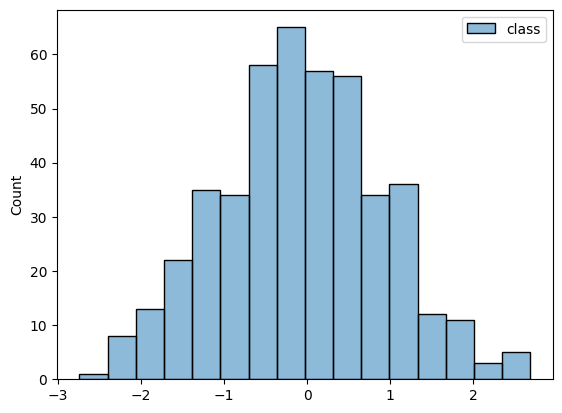

In [36]:
artificial_data_generator_tools.plot_distribution_of_class_features_for_single_class(class1_np)

## Transform to lognormal

In [37]:
log_normal_distributed_class1_np = (
    artificial_data_generator_tools.transform_normal_distributed_class_features_to_lognormal_distribution(
        class_features_np=class1_np
    )
)
assert log_normal_distributed_class1_np.shape[1] == number_of_informative_features

In [38]:
#TODO Show new Plot -> kurze Erklärung? 

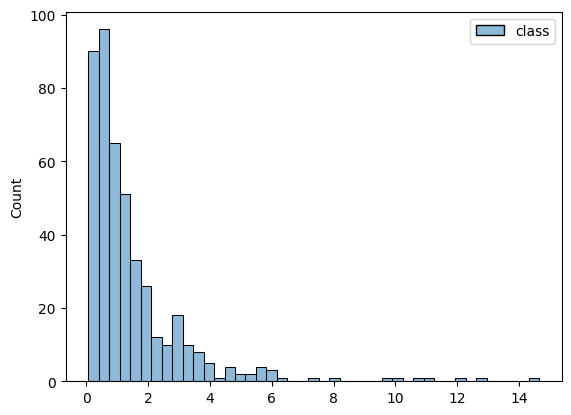

In [39]:
artificial_data_generator_tools.plot_distribution_of_class_features_for_single_class(
    log_normal_distributed_class1_np,
)

## Generate class 2 
-> #TODO relevante Informationen

In [40]:
class2_np = artificial_data_generator_tools.generate_normal_distributed_informative_features_for_one_class(
    number_of_samples=number_of_samples_per_class,
    number_of_normal_distributed_relevant_features=number_of_informative_features,
    scale=1,
)
class2_np = artificial_data_generator_tools.build_class(class_features_list=[class2_np])

#TODO Show Plot Class 2 -> kurze Erklärung?  

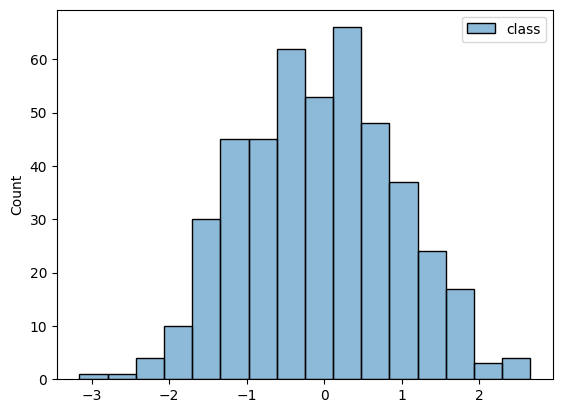

In [41]:
artificial_data_generator_tools.plot_distribution_of_class_features_for_single_class(class2_np)

In [42]:
#TODO show plot for both classes

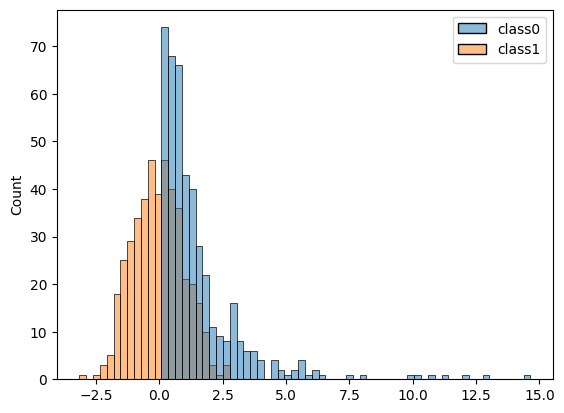

In [43]:
artificial_data_generator_tools.plot_distributions_of_all_classes([log_normal_distributed_class1_np, class2_np])

In [44]:
#TODO shift class to enlarge effectsize

In [45]:
shifted_class1_np = artificial_data_generator_tools.shift_class_to_enlarge_effectsize(
    log_normal_distributed_class1_np, effect_size=0.5
)

#TODO show new Plot

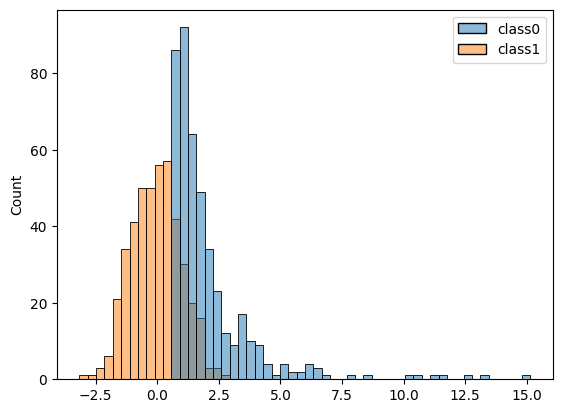

In [46]:
artificial_data_generator_tools.plot_distributions_of_all_classes([shifted_class1_np, class2_np])

#TODO erklärung, was die nächste Zeile macht / wofür sinnvoll?

In [47]:
indices_of_perfectly_separated_features = artificial_data_generator_tools.find_perfectly_separated_features(
    [shifted_class1_np, class2_np]
)

Feature 2 perfectly separates class 0 and class 1
Feature 10 perfectly separates class 0 and class 1
Feature 18 perfectly separates class 0 and class 1
Feature 22 perfectly separates class 0 and class 1
Feature 23 perfectly separates class 0 and class 1


#TODO erklärung, dass hier die daten zusammengesetzt werden, output erklären

In [48]:
artificial_data_df = artificial_data_generator_tools.generate_artificial_classification_data(
    generated_classes_list=[shifted_class1_np, class2_np],
    number_of_samples_per_class=number_of_samples_per_class,
    number_of_random_features=number_of_random_features,
    number_of_pseudo_class_features=number_of_pseudo_class_features,
    number_of_pseudo_classes=2,
)
print(artificial_data_df.shape)

(30, 10041)


#TODO erklärung

#TODO evtl. Zusammenfassung der beiden Schritte und Output vorher/nachher/differenz

In [49]:
separated_artificial_data_df = artificial_data_generator_tools.drop_perfectly_separated_features(
    list_of_perfectly_separated_features=indices_of_perfectly_separated_features, data_df=artificial_data_df
)
print(separated_artificial_data_df.shape)

# check if first column is class label
assert separated_artificial_data_df.columns[0] == "label"

(30, 10036)


#TODO erklärung informative features

In [50]:
# number of informative features
number_of_informative_separated_features = number_of_informative_features - len(indices_of_perfectly_separated_features)
print(number_of_informative_separated_features)

25


#TODO save csv Pfad ändern

In [ ]:
# save csv
separated_artificial_data_df.to_csv(
    f"../examples/data/separated_i{number_of_informative_separated_features}.csv", index=False
)